<a href="https://colab.research.google.com/github/Shiyasalloor/Machine_Learning_And_Parellel_Computing/blob/main/Question_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor
import time
import numpy as np

In [2]:
# Load the image
def load_image(filepath):
    image = cv2.imread(filepath)
    if image is None:
        raise FileNotFoundError("Image not found.")
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [3]:
# Display the image
def display_image(title, image):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

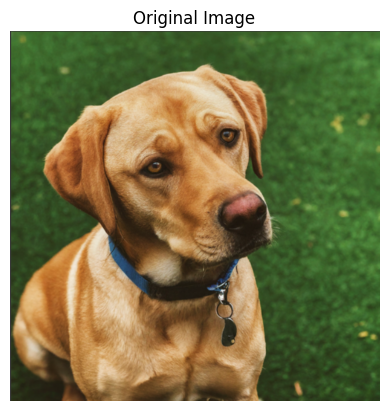

In [6]:
image = load_image("/content/dog.png")  # Replace with your image path
display_image("Original Image", image)

In [5]:
# Image blurring
def blur_image(image):
    kernel = np.ones((7, 7), np.float32) / 25
    return cv2.filter2D(image, -1, kernel)

In [7]:
# Image sharpening
def sharpen_image(image):
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    return cv2.filter2D(image, -1, kernel)

In [8]:
# Edge detection (Sobel operator)
def edge_detection(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    edges = cv2.magnitude(sobelx, sobely)
    return cv2.convertScaleAbs(edges)

In [10]:
def parallelize(image, func):
    with ThreadPoolExecutor() as executor:
        result = executor.submit(func, image)
        return result.result()

In [11]:
def measure_time(func, image):
    start = time.time()
    result = func(image)
    end = time.time()
    return result, end - start

In [12]:
# Without parallelization
blurred, blur_time = measure_time(blur_image, image)
sharpened, sharpen_time = measure_time(sharpen_image, image)
edges, edge_time = measure_time(edge_detection, image)

In [13]:
# With parallelization
blurred_parallel, blur_time_parallel = measure_time(lambda img: parallelize(img, blur_image), image)
sharpened_parallel, sharpen_time_parallel = measure_time(lambda img: parallelize(img, sharpen_image), image)
edges_parallel, edge_time_parallel = measure_time(lambda img: parallelize(img, edge_detection), image)

In [14]:
print(f"Blur Time: {blur_time:.4f}s (Parallel: {blur_time_parallel:.4f}s)")
print(f"Sharpen Time: {sharpen_time:.4f}s (Parallel: {sharpen_time_parallel:.4f}s)")
print(f"Edge Detection Time: {edge_time:.4f}s (Parallel: {edge_time_parallel:.4f}s)")

Blur Time: 0.0303s (Parallel: 0.0117s)
Sharpen Time: 0.0045s (Parallel: 0.0025s)
Edge Detection Time: 0.0201s (Parallel: 0.0105s)


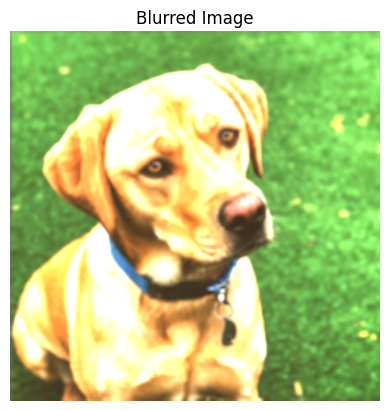

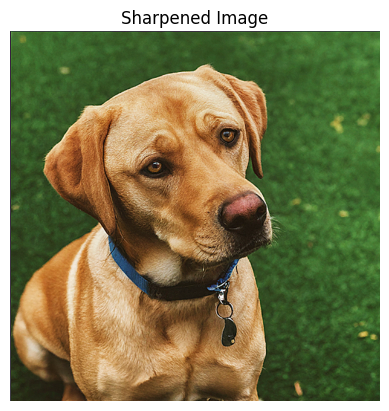

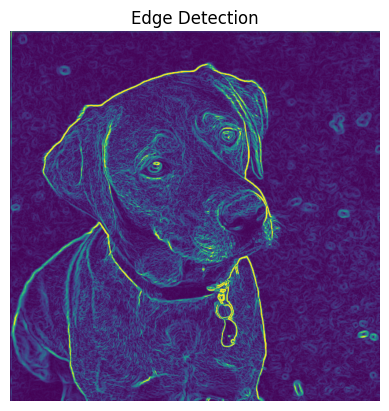

In [15]:
# Display processed images
display_image("Blurred Image", blurred)
display_image("Sharpened Image", sharpened)
display_image("Edge Detection", edges)